In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_table('/Users/jakub/Downloads/si/transcoding_mesurment.tsv')
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [84]:
# drop umem, id
df = df.drop(['umem', 'id', 'i', 'p', 'b', 'i_size', 'p_size', 'b_size'],axis=1)


df.head()

,duration,codec,width,height,bitrate,framerate,frames,size,o_codec,o_bitrate,o_framerate,o_width,o_height,utime
0,130.35667,mpeg4,176,144,54590,12.0,1564,889537,mpeg4,56000,12.0,176,144,0.612
1,130.35667,mpeg4,176,144,54590,12.0,1564,889537,mpeg4,56000,12.0,320,240,0.980
2,130.35667,mpeg4,176,144,54590,12.0,1564,889537,mpeg4,56000,12.0,480,360,1.216
3,130.35667,mpeg4,176,144,54590,12.0,1564,889537,mpeg4,56000,12.0,640,480,1.692
4,130.35667,mpeg4,176,144,54590,12.0,1564,889537,mpeg4,56000,12.0,1280,720,3.456


In [85]:
df.describe()

,duration,width,height,bitrate,framerate,frames,size,o_bitrate,o_framerate,o_width,o_height,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,6641.708377,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,6153.342453,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,192.000000,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,2417.000000,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,5628.000000,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,9232.000000,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,310129.000000,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,224.574000


In [86]:
df.iloc[1]

duration       130.35667
codec              mpeg4
width                176
height               144
bitrate            54590
framerate           12.0
frames              1564
size              889537
o_codec            mpeg4
o_bitrate          56000
o_framerate         12.0
o_width              320
o_height             240
utime               0.98
Name: 1, dtype: object

In [87]:
# extract time to the separate dataset
data = df.copy()
data = data.drop(['utime'],axis=1)

In [88]:
target = df.copy()
target = target.drop(target.columns[0:-1], axis=1)
target.describe()

,utime
count,68784.000000
mean,9.996355
std,16.107429
min,0.184000
25%,2.096000
50%,4.408000
75%,10.433000
max,224.574000


In [89]:
print(data.values.shape)

(68784, 13)


In [90]:
print(target.to_numpy().flatten().shape)

(68784,)


In [91]:
# convert to numpy type
data = data.to_numpy()
target = target.to_numpy().flatten()

In [92]:
# target = target.values.tolist()
# print(target[0])

In [93]:
# encode string values
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)
print(scaled_data)

[[-6.06154925e-01  3.95869357e-01 -1.42030477e+00 ... -1.41365348e+00
  -1.46314024e+00 -1.46314024e+00]
 [-6.06154925e-01  3.95869357e-01 -1.42030477e+00 ... -1.41365348e+00
  -8.77632178e-01 -8.77632178e-01]
 [-6.06154925e-01  3.95869357e-01 -1.42030477e+00 ... -1.41365348e+00
  -2.92124121e-01 -2.92124121e-01]
 ...
 [ 3.93674513e-01  1.41045606e+00 -7.39484930e-01 ... -1.41365348e+00
  -1.46314024e+00 -1.46314024e+00]
 [-1.73004061e-01 -6.18717343e-01  1.30297460e+00 ... -1.41365348e+00
  -8.77632178e-01 -8.77632178e-01]
 [ 6.28162198e-01  3.95869357e-01 -1.42030477e+00 ...  3.18628864e-04
  -1.46314024e+00 -1.46314024e+00]]


In [95]:
scaled_p = pd.DataFrame(scaled_data)

In [96]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.pairplot(scaled_p, diag_kind="kde")

In [97]:
scaled_p.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04,6.878400e+04
mean,9.916856e-17,2.512270e-16,5.950114e-17,5.950114e-17,1.437944e-16,1.156967e-16,1.024742e-16,1.074326e-16,2.809776e-17,-4.937768e-17,1.565004e-17,3.522550e-17,3.522550e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.957716e+00,-1.633304e+00,-1.420305e+00,-1.420305e+00,-1.742394e+00,-1.371686e+00,-1.884563e+00,-1.858984e+00,-1.345474e+00,-1.498339e+00,-1.413653e+00,-1.463140e+00,-1.463140e+00
25%,-8.634400e-01,-6.187173e-01,-7.394849e-01,-7.394849e-01,-7.850946e-01,-1.051010e+00,-7.029694e-01,-9.027782e-01,-4.512476e-01,-9.986019e-01,-7.066674e-01,-8.776322e-01,-8.776322e-01
50%,3.252823e-01,-6.187173e-01,-5.866509e-02,-5.866509e-02,-2.763555e-02,-2.577584e-01,2.722616e-01,7.287596e-02,4.429793e-01,8.718369e-04,3.186289e-04,-2.921241e-01,-2.921241e-01
75%,8.626499e-01,1.410456e+00,6.221548e-01,6.221548e-01,8.200739e-01,5.692482e-01,8.880218e-01,7.892200e-01,1.337206e+00,1.000346e+00,7.073047e-01,8.788920e-01,8.788920e-01
max,1.575883e+00,1.410456e+00,1.983794e+00,1.983794e+00,1.783820e+00,3.016512e+00,1.586993e+00,1.700047e+00,1.337206e+00,1.500083e+00,1.414291e+00,1.464400e+00,1.464400e+00


In [98]:
# split 9:1
from sklearn.model_selection import train_test_split

train_data, test_data, \
train_target, test_target = \
train_test_split(scaled_data, target, test_size=0.1, random_state=2115)

In [99]:
print("Training dataset:")
print("train_data:", train_data.shape)
print("train_target:", train_target.shape)

Training dataset:
train_data: (61905, 13)
train_target: (61905,)


In [100]:
print("Testing dataset:")
print("test_data:", test_data.shape)
print("test_target:", test_target.shape)

Testing dataset:
test_data: (6879, 13)
test_target: (6879,)


In [107]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_data, train_target)

LinearRegression()

In [108]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(test_target, linear_regression.predict(test_data)))

Mean squared error of a learned model: 185.61


In [109]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(test_target, linear_regression.predict(test_data)))

Variance score: 0.30


In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), scaled_data, target, cv=4)
print(scores)

[0.28506885 0.2882786  0.28821557 0.27474836]


In [141]:
id=2946
linear_regression_prediction = linear_regression.predict(test_data[id,:].reshape(1,-1))

In [142]:
print("Model predicted for video {0} value {1}".format(id, linear_regression_prediction))

Model predicted for video 2946 value [14.55185525]


In [113]:
print("Real value for video \"{0}\" is {1}".format(id, test_target[id]))

Real value for video "5" is 18.189


In [121]:


train_data, test_data, \
train_target, test_target = \
train_test_split(scaled_data, target, test_size=0.2, random_state=2115)


neural_network = MLPRegressor(hidden_layer_sizes=(30,20,10,), activation='logistic', solver="sgd", \
                              batch_size=20, shuffle=True, momentum=0.95, alpha=1e-5, verbose=False, \
                              max_iter=500, tol=1e-7, random_state=1)

neural_network.fit(train_data, train_target)

print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(test_target, neural_network.predict(test_data)))

Mean squared error of a learned neural network model: 3.98


In [122]:
from sklearn.metrics import r2_score

print('Variance score for linear model: %.2f' % r2_score(test_target, linear_regression.predict(test_data)))
print('Variance score for neural network model: %.2f' % r2_score(test_target, neural_network.predict(test_data)))

Variance score for linear model: 0.30
Variance score for neural network model: 0.98


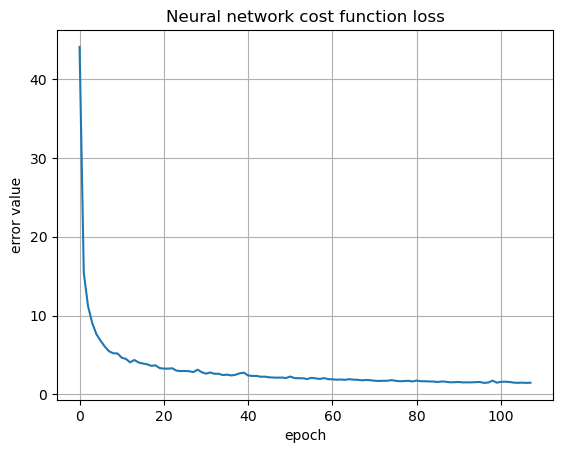

In [123]:
import matplotlib.pyplot as plt
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

In [129]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['adam'], 'max_iter': [50], \
              'hidden_layer_sizes':[(10,), (30,20,10,), (20,10,)], \
              'tol':[1e-7], 'batch_size':[20, 60],\
              'momentum':[0.95, 0.85], 'activation': ['logistic','relu'], 'alpha':[1e-5, 1e-6]}

grid_search = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1, verbose=0, cv=4) #n_jpbs=-1 to use all available CPU cores
grid_search.fit(train_data, train_target)
        
print(grid_search.score(test_data, test_target))
print(grid_search.best_params_)

/Users/jakub/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakub/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakub/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakub/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jakub/anaconda3/lib/python3.10/si

0.9716373555839887
{'activation': 'relu', 'alpha': 1e-06, 'batch_size': 20, 'hidden_layer_sizes': (30, 20, 10), 'max_iter': 50, 'momentum': 0.95, 'solver': 'adam', 'tol': 1e-07}


/Users/jakub/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [130]:
print(grid_search.score(test_data, test_target))
print(grid_search.best_params_)

0.9716373555839887
{'activation': 'relu', 'alpha': 1e-06, 'batch_size': 20, 'hidden_layer_sizes': (30, 20, 10), 'max_iter': 50, 'momentum': 0.95, 'solver': 'adam', 'tol': 1e-07}


In [136]:
id=2946
neural_network_prediction = grid_search.predict(test_data[id,:].reshape(1,-1))
print("Model predicted for video {0} value {1}".format(id, neural_network_prediction))
print("Real value for video \"{0}\" is {1}".format(id, test_target[id]))

Model predicted for video 2946 value [20.57568799]
Real value for video "2946" is 21.753
